In [1]:
from ryPat import *


# Multivariable calculus


In [409]:
def f0(x,y):
    '''
    這是要模擬 躺平在xy平面上的函數
    '''
    z= 1e-10 * (x+y)
    return z

In [247]:
def f(x,y):
    zx=  (x+10)*(x+5)*(x-1)*(x-5)*(x-10)
    zy=  (y+10)*(y+2)*(y+1)*(y-2)*(y-10)
    z= zx*zy
    
    return z

x,y= sm.symbols('x,y')
z= f(x,y)

%matplotlib qt
q= sm.plotting.plot3d(
   z,
   (x,-10,10), 
   (y,-10,10),
   xlabel= 'x',
   ylabel= 'y',
   title= f'z= f(x,y)= {z}',
   #cmap= 'rainbow',
   show=False)

q.show()


In [248]:
z


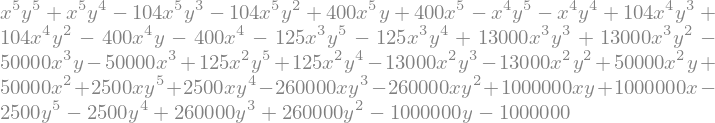

In [249]:
z.expand()

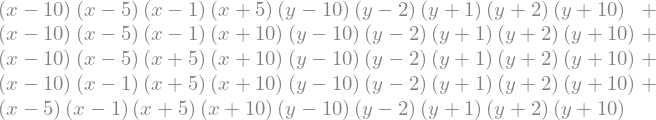

In [250]:
dzx= z.diff(x)#.simplify()
dzx

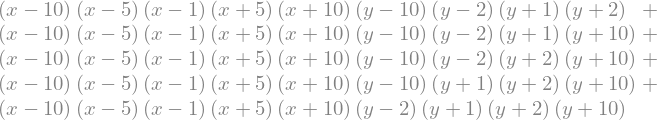

In [251]:
dzy= z.diff(y)#.simplify()
dzy

In [158]:
dzx.subs({x:-5,y:-8})

In [159]:
dzy.subs({x:-5,y:-8})

# Case study 2: solving systems of equations
- https://mzucker.github.io/2018/04/06/why-every-gfx-cv-robotics-programmer-should-love-sympy.html    

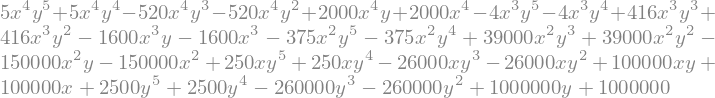

In [256]:
dzx= dzx.expand()
dzx

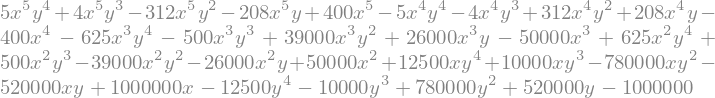

In [257]:
dzy= dzy.expand()
dzy

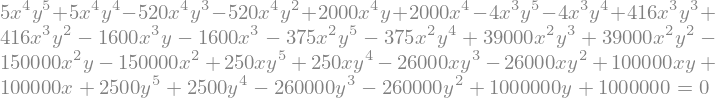

In [258]:
eq1= sm.Eq(dzx,0)
eq2= sm.Eq(dzy,0)
eq1

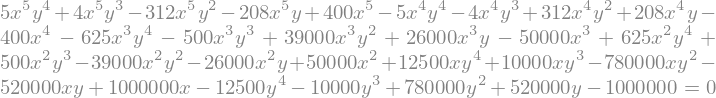

In [259]:
eq2

In [269]:
#sm.solve([eq1, eq2],x,y, 
#         dict=True, 
#         #simplify=True
#        )
# 算很久，沒等到算出來！

In [187]:
# 先試一些小的來看看！
eq1= sm.Eq(x+y-5,0)
eq2= sm.Eq(x-y+1,0)
sm.solve([eq1, eq2],x,y)

In [198]:
eq1= sm.Eq(x+y,5)
eq2= sm.Eq(x-y,-1)
sm.solve([eq1, eq2],x,y)

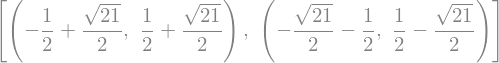

In [199]:
eq1= sm.Eq(x*y,5)
eq2= sm.Eq(x-y,-1)
sm.solve([eq1, eq2],x,y)

In [270]:
#eq1= sm.Eq(x   -y**2, 2)
#eq2= sm.Eq(x**2-y,    1)
#sm.solve([eq1, eq2],x,y,
#         dict=True, 
#         simplify=True
#        )

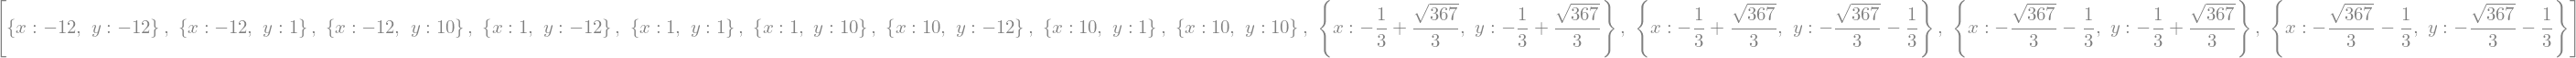

In [271]:
# 再找一個比較簡單的例子。

f0= (x-1)*(x-10)*(y-1)*(y-10)*(x+12)*(y+12)
f0

f1= f0.diff(x)
f2= f0.diff(y)
f1, f2

eq1= sm.Eq(f1, 0)
eq2= sm.Eq(f2, 0)
eq1, eq2

解= sm.solve([eq1, eq2],x,y,
         dict=True, 
         #simplify=True
        )
解

In [272]:
q= sm.plotting.plot3d(f0,
                      (x,-10,10),(y,-10,10),
                      xlabel='x',
                      ylabel='y',
                      title=f'z= {f0}')

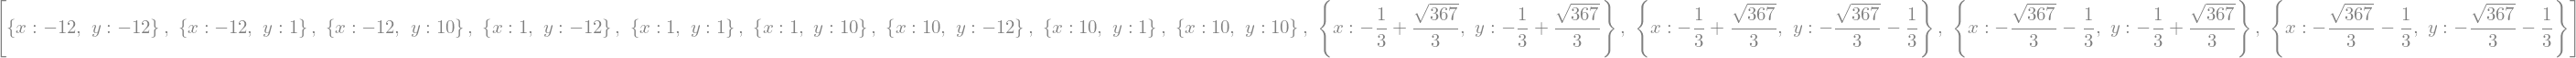

In [263]:
解

In [266]:
len(解)

In [282]:
# 回到更基礎的 numpy 配 matplotlib 來畫圖

xx= np.linspace(-10,10,101)
yy= np.linspace(-10,10,101)
xm, ym= np.meshgrid(xx,yy)
xm.shape


In [283]:
#np.meshgrid?
np.mgrid[0:10, 0:10]


array([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
        [7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
        [8, 8, 8, 8, 8, 8, 8, 8, 8, 8],
        [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]],

       [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]])

In [284]:
xv= np.arange(10).reshape(-1,1)
xv

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [285]:
yv= np.ones(10).reshape(1,-1)
yv

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [286]:
xm= xv@yv
xm

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4., 4., 4., 4., 4., 4.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [6., 6., 6., 6., 6., 6., 6., 6., 6., 6.],
       [7., 7., 7., 7., 7., 7., 7., 7., 7., 7.],
       [8., 8., 8., 8., 8., 8., 8., 8., 8., 8.],
       [9., 9., 9., 9., 9., 9., 9., 9., 9., 9.]])

In [287]:
ym= xm.T
ym

array([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [288]:
pl.plot(xm, ym,'o')
#, xlabel='x', ylabel='y')
#pl.plot?

In [289]:
# meshgrid
iv, jv= np.ogrid[0:5, 0:10]
iv, jv

(array([[0],
        [1],
        [2],
        [3],
        [4]]),
 array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]))

In [290]:
im= iv @ np.ones_like(jv)
jm= np.ones_like(iv) @ jv
im, jm

(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]]),
 array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]))

In [291]:
import matplotlib.pyplot as plt

plt.figure()
plt.title('ryMeshgrid')
plt.xlabel('x, col: j')
plt.ylabel('y, row: i')
plt.grid(True)

plt.xticks(jv.flatten())
plt.yticks(iv.flatten())

ym, xm= im, jm

plt.scatter(xm,
            ym,
            color="gray", 
            marker="o")

plt.scatter(jv, 
            jv*0, 
            color="red", 
            marker="x")

plt.scatter(iv*0, 
            iv, 
            color="purple", 
            marker="^")

In [16]:
xm

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [17]:
ym

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]])

In [18]:
# numpy 提供了 mgrid[] 來自動化上述行動，小心一下 ym, xm = im, jm (垂直、水平) 的對應
im, jm= np.mgrid[0:5, 0:10]
ym, xm= im, jm

In [19]:
xm

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [20]:
ym

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4]])

In [292]:
# 改變2D函數形式，做一些圖來瞧瞧。

zm= np.sin(xm)*ym
pl.figure()
pl.imshow(zm, 
          origin='lower',  # 用這行 把原點 (0,0) 設在左【下】角
          cmap= 'rainbow' #'viridis',
          )
pl.xlabel('x')
pl.ylabel('y')
pl.title('z= f(x,y)= sin(x)*y, Rainbow colors map f(x,y) values')
pl.colorbar()


In [293]:
# 終於可以用numpy + matplotlib 畫任意 2D 函數圖形
def f(x,y):
    zx=  (x+10)*(x+5)*(x-1)*(x-5)*(x-10)
    zy=  (y+10)*(y+2)*(y+1)*(y-2)*(y-10)
    z= zx*zy
    
    return z

ym, xm= np.mgrid[-10:10.1:.1, -10:10.1:.1]
zm= f(xm,ym)
pl.figure()
pl.imshow(zm, 
          origin='lower',  # 用這行 把原點 (0,0) 設在左【下】角
          cmap= 'rainbow' #'viridis'
          )
pl.xlabel('x')
pl.ylabel('y')
pl.title('z= f(x,y), Rainbow colors map f(x,y) values')
#plt.xticks(np.arange(0,xm[0].size,step=10), xm[0,0::10])
#plt.yticks([])#ym[0])
# 但是 x,y 軸上的數值標示仍未搞定，
# 目前適用矩陣的 index (0,1,2,...)而非 x,y 的真實值

pl.colorbar()

In [294]:
## 試試 3D

from mpl_toolkits import mplot3d

fg= pl.figure()

ax= pl.axes(projection='3d', 
            xlabel= 'x', 
            ylabel= 'y', 
            title= 'z= f(x,y)')

#ax.contour3D(xm, ym, zm, 100, cmap='rainbow')

'''
ax.plot_wireframe(xm, ym, zm,
                rstride= 5, 
                cstride= 5
                )
'''


#'''
ax.plot_surface(xm,ym,zm, 
                rstride= 5, 
                cstride= 5,
                cmap=     'rainbow',  
                edgecolor= 'gray'
               )
#'''





In [65]:
# 想畫 z 軸，但仍不好看！

zAxis= xm[0] / xm[0].max() * abs(zm).max()
zAxis
ax.scatter3D(xm[0]*0, 
             xm[0]*0, 
             zAxis, 
             color='magenta')

In [61]:
zAxis= xm[0] / xm[0].max() * abs(zm).max()
zAxis

array([-2.49364746e+08, -2.46871098e+08, -2.44377451e+08, -2.41883803e+08,
       -2.39390156e+08, -2.36896508e+08, -2.34402861e+08, -2.31909214e+08,
       -2.29415566e+08, -2.26921919e+08, -2.24428271e+08, -2.21934624e+08,
       -2.19440976e+08, -2.16947329e+08, -2.14453681e+08, -2.11960034e+08,
       -2.09466386e+08, -2.06972739e+08, -2.04479091e+08, -2.01985444e+08,
       -1.99491797e+08, -1.96998149e+08, -1.94504502e+08, -1.92010854e+08,
       -1.89517207e+08, -1.87023559e+08, -1.84529912e+08, -1.82036264e+08,
       -1.79542617e+08, -1.77048969e+08, -1.74555322e+08, -1.72061675e+08,
       -1.69568027e+08, -1.67074380e+08, -1.64580732e+08, -1.62087085e+08,
       -1.59593437e+08, -1.57099790e+08, -1.54606142e+08, -1.52112495e+08,
       -1.49618847e+08, -1.47125200e+08, -1.44631553e+08, -1.42137905e+08,
       -1.39644258e+08, -1.37150610e+08, -1.34656963e+08, -1.32163315e+08,
       -1.29669668e+08, -1.27176020e+08, -1.24682373e+08, -1.22188725e+08,
       -1.19695078e+08, -

In [93]:
zm.argmax(axis=0)

array([  0,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,
        21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,
        21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,
        21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,   0, 178,
       178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178,
       178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178,
       178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178,
       178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178,
       178, 178, 178, 178, 178, 178,   0,  21,  21,  21,  21,  21,  21,
        21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,
        21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,  21,
        21,  21,  21,  21,  21,  21,  21,   0, 178, 178, 178, 178, 178,
       178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178,
       178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 17

In [88]:
zm.min(axis=0)

array([ 0.00000000e+00, -3.10199681e+07, -5.95115578e+07, -8.55787376e+07,
       -1.09323126e+08, -1.30844013e+08, -1.50238387e+08, -1.67600956e+08,
       -1.83024170e+08, -1.96598249e+08, -2.08411199e+08, -2.18548845e+08,
       -2.27094846e+08, -2.34130724e+08, -2.39735885e+08, -2.43987642e+08,
       -2.46961241e+08, -2.48729883e+08, -2.49364746e+08, -2.48935011e+08,
       -2.47507887e+08, -2.45148627e+08, -2.41920561e+08, -2.37885113e+08,
       -2.33101828e+08, -2.27628391e+08, -2.21520658e+08, -2.14832673e+08,
       -2.07616692e+08, -1.99923210e+08, -1.91800983e+08, -1.83297050e+08,
       -1.74456759e+08, -1.65323787e+08, -1.55940167e+08, -1.46346310e+08,
       -1.36581029e+08, -1.26681562e+08, -1.16683595e+08, -1.06621287e+08,
       -9.65272923e+07, -8.64327844e+07, -7.63674795e+07, -6.63596601e+07,
       -5.64361983e+07, -4.66225793e+07, -3.69429253e+07, -2.74200184e+07,
       -1.80753247e+07, -8.92901722e+06, -0.00000000e+00, -6.72438040e+06,
       -1.32543290e+07, -

In [91]:
zm.max()

In [92]:
ii, jj= np.where(zm == zm.max())
ii, jj

(array([178], dtype=int64), array([183], dtype=int64))

In [85]:
zm[ii,jj]

array([-2.49364746e+08])

In [82]:
zm.max()

In [83]:
ii,jj

(array([178], dtype=int64), array([183], dtype=int64))

In [114]:
# 找最高與最低
zm.max(), zm.argmax()
zm.min(), zm.argmin()
imax, jmax= np.where(zm==zm.max())
imin, jmin= np.where(zm==zm.min())
imax, jmax, imin, jmin

(array([178], dtype=int64),
 array([183], dtype=int64),
 array([178], dtype=int64),
 array([18], dtype=int64))

In [131]:
pl.figure()
pl.imshow(zm, 
          origin='lower',  # 用這行 把原點 (0,0) 設在左【下】角
          cmap= 'rainbow' #'viridis'
          )

pl.xlabel('x')
pl.ylabel('y')
pl.title('z= f(x,y), Finding the max and min')

pl.colorbar()

# 注意 .plot() 與 .imshow() 的座標對應 .plot(x,y) ==> .imshow(i,j)
# x,y = j,i
xmax, ymax= jmax, imax
xmin, ymin= jmin, imin

pl.plot(xmax, ymax, 'wx')
pl.plot(xmin, ymin, 'wo')
pl.text(xmax, ymax, 'max', color='b')
pl.text(xmin, ymin, 'min', color='y')

Text([18], [178], 'min')

In [268]:
#pl.text?

In [327]:
# 終於可以用numpy + matplotlib 畫任意 2D 函數圖形
# 再加碼 畫 vector field

def f(x,y):
    
    zx=  (x+10)*(x+5)*(x-1)*(x-5)*(x-10)
    zy=  (y+10)*(y+2)*(y+1)*(y-2)*(y-10)
    z= zx*zy
    z= sm.sin(x)+sm.cos(y)
    
    return z

ϵ= 0.1
ym, xm= np.mgrid[-10:10+ϵ:ϵ, -10:10+ϵ:ϵ]
zm= f(xm,ym)
pl.figure()
pl.imshow(zm, 
          origin='lower',  # 用這行 把原點 (0,0) 設在左【下】角
          cmap= 'rainbow' #'viridis'
          )
pl.xlabel('x')
pl.ylabel('y')
pl.title('z= f(x,y), with gradient field')
#plt.xticks(np.arange(0,xm[0].size,step=10), xm[0,0::10])
#plt.yticks([])#ym[0])
# 但是 x,y 軸上的數值標示仍未搞定，
# 目前適用矩陣的 index (0,1,2,...)而非 x,y 的真實值

pl.colorbar()

# 初步練習， u,v 先設成 (1,1)，之後調為 真正 的 gradient vector
u= 1 
v= 1

x,y= sm.symbols('x,y')
dfx= f(x,y).diff(x)
dfy= f(x,y).diff(y)

#dfx,dfy
u= sm.lambdify([x,y],dfx)(xm,ym)
v= sm.lambdify([x,y],dfy)(xm,ym)

#dfx,dfy

# downSampleFactor=2 ~ 10 # 調整 箭頭 疏密程度
downSampleFactor= 2
xmm= xm[::downSampleFactor,::downSampleFactor]
ymm= ym[::downSampleFactor,::downSampleFactor]

# u,v 為真正 的 gradient vector
u= sm.lambdify([x,y],dfx)(xmm,ymm)
v= sm.lambdify([x,y],dfy)(xmm,ymm)


# 要調整一下座標 原點 以及 縮放尺度 (scale)
xmm= (xmm+10)*(1/ϵ)
ymm= (ymm+10)*(1/ϵ)

q= plt.quiver(xmm,ymm,u,v)
q

AttributeError: 'ImmutableDenseNDimArray' object has no attribute 'could_extract_minus_sign'

In [299]:
#plt.quiver?

Signature: plt.quiver(*args, data=None, **kw)
Docstring:
Plot a 2D field of arrows.

Call signature::

  quiver([X, Y], U, V, [C], **kw)

*X*, *Y* define the arrow locations, *U*, *V* define the arrow directions, and
*C* optionally sets the color.

**Arrow size**

The default settings auto-scales the length of the arrows to a reasonable size.
To change this behavior see the *scale* and *scale_units* parameters.

**Arrow shape**

The defaults give a slightly swept-back arrow; to make the head a
triangle, make *headaxislength* the same as *headlength*. To make the
arrow more pointed, reduce *headwidth* or increase *headlength* and
*headaxislength*. To make the head smaller relative to the shaft,
scale down all the head parameters. You will probably do best to leave
minshaft alone.

**Arrow outline**

*linewidths* and *edgecolors* can be used to customize the arrow
outlines.

Parameters
----------
X, Y : 1D or 2D array-like, optional
    The x and y coordinates of the arrow locations.

  

In [297]:
xm

array([[-10. ,  -9.9,  -9.8, ...,   9.8,   9.9,  10. ],
       [-10. ,  -9.9,  -9.8, ...,   9.8,   9.9,  10. ],
       [-10. ,  -9.9,  -9.8, ...,   9.8,   9.9,  10. ],
       ...,
       [-10. ,  -9.9,  -9.8, ...,   9.8,   9.9,  10. ],
       [-10. ,  -9.9,  -9.8, ...,   9.8,   9.9,  10. ],
       [-10. ,  -9.9,  -9.8, ...,   9.8,   9.9,  10. ]])

In [507]:

from mpl_toolkits import mplot3d

fg= pl.figure()

zz= f(xx,yy)

ax= pl.axes(projection='3d', 
            xlabel= 'x', 
            ylabel= 'y', 
            title= f'z= {z}')
#ax.plot3D(xx, yy, zz)


#ax.contour3D(xm, ym, zm, 100) #, cmap='binary')
#ax.plot_wireframe(xm, ym, zm)
#'''
ax.plot_surface(xm,ym,zm, 
                rstride= 5, 
                cstride= 5,
                cmap=     'viridis', #'rainbow',  
                edgecolor='none'
               )
#'''
ax.scatter3D(xx*0, 
             yy*0, 
             xx/max(xx)*max(abs(zz)), 
             color='magenta')

In [457]:
ax.set_xlabel('x')
ax.set_ylabel('y')


Text(0.07047665878555721, -0.07320235304988147, 'y')

In [495]:
xx/max(xx)

array([-1.  , -0.98, -0.96, -0.94, -0.92, -0.9 , -0.88, -0.86, -0.84,
       -0.82, -0.8 , -0.78, -0.76, -0.74, -0.72, -0.7 , -0.68, -0.66,
       -0.64, -0.62, -0.6 , -0.58, -0.56, -0.54, -0.52, -0.5 , -0.48,
       -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 ,
       -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16, -0.14, -0.12,
       -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,
        0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,  0.22,  0.24,
        0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,  0.4 ,  0.42,
        0.44,  0.46,  0.48,  0.5 ,  0.52,  0.54,  0.56,  0.58,  0.6 ,
        0.62,  0.64,  0.66,  0.68,  0.7 ,  0.72,  0.74,  0.76,  0.78,
        0.8 ,  0.82,  0.84,  0.86,  0.88,  0.9 ,  0.92,  0.94,  0.96,
        0.98,  1.  ])

# https://krajit.github.io/sympy/vectorFields/vectorFields.html

In [279]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
%matplotlib qt

x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

u = 1
v = -1

plt.quiver(x,y,u,v)
plt.show()


In [276]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

u = x/np.sqrt(x**2 + y**2)
v = y/np.sqrt(x**2 + y**2)

plt.quiver(x,y,u,v)
plt.show()

In [280]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))

u = -y/np.sqrt(x**2 + y**2)
v = x/np.sqrt(x**2 + y**2)

plt.quiver(x,y,u,v)
plt.show()

In [281]:
#%reset -f
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline


fig = plt.figure()
ax = fig.gca(projection='3d')

x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

ax.quiver(x, y, z, u, v, w, length=0.1, color = 'black')

plt.show()

In [88]:

'''
x= sm.symbols('x')
y= sm.sin(10*x)
z= f(x,y)

sm.plotting.plot3d_parametric_line(
    (x, y, z, (x,0,1)),
    xlabel= 'x', 
    ylabel='y')
'''

"\nx= sm.symbols('x')\ny= sm.sin(10*x)\nz= f(x,y)\n\nsm.plotting.plot3d_parametric_line(\n    (x, y, z, (x,0,1)),\n    xlabel= 'x', \n    ylabel='y')\n"

In [90]:
z

x + y**2

In [91]:
f(x,y)

x + y**2

In [92]:
f(x,y).diff(x)

1

In [93]:
f(x,y).diff(y)

2*y

In [109]:
sm.Integral(
    sm.Derivative(
        f(x,y),
        x),
    x)

Integral(Derivative(x + y**2, x), x)

In [110]:
sm.Derivative(
    f(x,y),
    x)

Derivative(x + y**2, x)

In [113]:
sm.Integral(
    f(x,y),
    x,
    y).doit()

x**2*y/2 + x*y**3/3

In [116]:
sm.Integral(
    f(x,y),
    (x,0,1),
    (y,0,1)).doit()

5/6

In [123]:
sm.Integral(
    1,
    (x,0,1),
    (y,0,1)).doit()

1

In [189]:
#
# 圓面積 π r**2
#
r= sm.symbols('r', positive=True)

y0=  sm.sqrt(r**2-x**2)

F= sm.Integral(
    1,
    (y,
     -y0,
     y0),
    (x,
     -r,
     r))
F

Integral(1, (y, -sqrt(r**2 - x**2), sqrt(r**2 - x**2)), (x, -r, r))

In [190]:
F.doit()

pi*r**2

In [197]:
F= sm.Integral(y0, (x,-r, r))*2
F

2*Integral(sqrt(r**2 - x**2), (x, -r, r))

In [198]:
F.doit()

pi*r**2

In [205]:

r, θ, dr, dθ= sm.symbols('r, θ, dr, dθ')
π= sm.pi

F= sm.Integral(
    r,
    (r, 0, r),
    (θ, 0, 2*π))

F

Integral(r, (r, 0, r), (θ, 0, 2*pi))

In [206]:
F.doit()

pi*r**2

In [208]:
#
# 圓柱 體積 π r**2 * h
#
r,h=   sm.symbols('r,h', positive=True)
x,y,z= sm.symbols('x,y,z')


y0=  sm.sqrt(r**2-x**2)

F= sm.Integral(
    1,
    (y,-y0, y0),
    (x, -r, r),
    (z, 0, h))
F

Integral(1, (y, -sqrt(r**2 - x**2), sqrt(r**2 - x**2)), (x, -r, r), (z, 0, h))

In [209]:
F.doit()

pi*h*r**2

In [215]:
#
# 圓柱，球屋頂，體積 
#
r,h=   sm.symbols('r,h', positive=True)
x,y,z= sm.symbols('x,y,z')


y0=  sm.sqrt(r**2-x**2)
z0=  sm.sqrt(r**2-x**2-y**2)
F= sm.Integral(
    1,
    (z,  0, h),
    (y,-y0, y0),
    (x, -r, r)
)
F

Integral(1, (z, 0, h), (y, -sqrt(r**2 - x**2), sqrt(r**2 - x**2)), (x, -r, r))

In [216]:
F.doit()

pi*h*r**2

In [217]:
F= sm.Integral(
    1,
    (z,  0, z0),
    (y,-y0, y0),
    (x, -r, r)
)
F

Integral(1, (z, 0, sqrt(r**2 - x**2 - y**2)), (y, -sqrt(r**2 - x**2), sqrt(r**2 - x**2)), (x, -r, r))

In [219]:
#F.doit()  # 這個要算很久，而且算出來結果蠻難看的，也不知對不對！ 也許該有其他做法。 直角坐標、球座標轉換後再來算！！


In [220]:
z0

sqrt(r**2 - x**2 - y**2)

In [225]:
sm.integrate(z0,(x,0,r),(y,0,r))

Integral(Piecewise((-I*(Integral(-r**2*polar_lift(r**2 - y**2)**2/(x**2*sqrt(x**2 - polar_lift(r**2 - y**2)) - sqrt(x**2 - polar_lift(r**2 - y**2))*polar_lift(r**2 - y**2)), (x, 0, r))/(r**2 - y**2) + Integral(r**4*x**2/(x**2*sqrt(x**2 - polar_lift(r**2 - y**2)) - sqrt(x**2 - polar_lift(r**2 - y**2))*polar_lift(r**2 - y**2)), (x, 0, r))/(r**2 - y**2) + Integral(-r**4*polar_lift(r**2 - y**2)/(x**2*sqrt(x**2 - polar_lift(r**2 - y**2)) - sqrt(x**2 - polar_lift(r**2 - y**2))*polar_lift(r**2 - y**2)), (x, 0, r))/(r**2 - y**2) + Integral(x**2*y**4/(x**2*sqrt(x**2 - polar_lift(r**2 - y**2)) - sqrt(x**2 - polar_lift(r**2 - y**2))*polar_lift(r**2 - y**2)), (x, 0, r))/(r**2 - y**2) + Integral(3*x**2*polar_lift(r**2 - y**2)**2/(x**2*sqrt(x**2 - polar_lift(r**2 - y**2)) - sqrt(x**2 - polar_lift(r**2 - y**2))*polar_lift(r**2 - y**2)), (x, 0, r))/(r**2 - y**2) + Integral(-2*x**4*polar_lift(r**2 - y**2)/(x**2*sqrt(x**2 - polar_lift(r**2 - y**2)) - sqrt(x**2 - polar_lift(r**2 - y**2))*polar_lift(r**2 

In [250]:
# (x,y,z) --> (r,θ,ϕ)

x, y, z, r, θ, ϕ = sm.symbols('x, y, z, r, θ, ϕ')

z= r *sm.cos(θ)

ρ= r *sm.sin(θ)  # 投影在 xy-plane 上的半徑

x= ρ *sm.cos(ϕ)
y= ρ *sm.sin(ϕ)

In [251]:
x

r*sin(θ)*cos(ϕ)

In [252]:
y

r*sin(θ)*sin(ϕ)

In [253]:
z

r*cos(θ)

In [258]:
F= sm.Matrix([x, y, z])
J= F.jacobian([r, θ, ϕ])
J

Matrix([
[sin(θ)*cos(ϕ), r*cos(θ)*cos(ϕ), -r*sin(θ)*sin(ϕ)],
[sin(θ)*sin(ϕ), r*sin(ϕ)*cos(θ),  r*sin(θ)*cos(ϕ)],
[       cos(θ),       -r*sin(θ),                0]])

In [260]:
J.det().simplify()

r**2*sin(θ)

In [277]:
F= sm.Integral(
    (1) * r**2 * sm.sin(θ),
    (ϕ, 0, 2*π),
    (θ, 0, π),
    (r, 0, r)
    )
F

Integral(r**2*sin(θ), (ϕ, 0, 2*pi), (θ, 0, pi), (r, 0, r))

In [281]:
dV, dx, dy, dz, dr, dθ, dϕ = sm.symbols('dV, dx, dy, dz, dr, dθ, dϕ')

dV1= dx *dy *dz
dV2= dr * (r*dθ) * (r*sm.sin(θ)*dϕ)


In [282]:
dV1

dx*dy*dz

In [283]:
dV2

dr*dθ*dϕ*r**2*sin(θ)

In [316]:
s,t,x,y= sm.symbols('s,t,x,y')
ds,dt,dx,dy= sm.symbols('ds,dt,dx,dy')

def f(x,y):
    z= x+2*y
    return z

#integrate(f(x,y)dxdy)
f_xy= f(x,y)

x= s+t
y= s-t

f_st= f(x,y)

f_xy, f_st



(x + 2*y, 3*s - t)

In [321]:
s,t,x,y= sm.symbols('s,t,x,y')
f_xy.integrate((x,0,1),(y,0,1))

3/2

In [322]:
f_st.integrate((s,0,1),(t,0,1))

1

In [311]:
y

s - t